In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Homework for the DataTalks.Club Machine Learning Zoomcamp
## Week 3: Classification

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv > data/housing.csv

--2022-10-15 16:15:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  6.05MB/s    in 0.2s    

2022-10-15 16:15:02 (6.05 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



In [3]:
data = pd.read_csv('data/housing.csv')

### Features

For the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity',


In [4]:
# Dataframe already has the correct features
len(data.columns)

10

### Data preparation

    Select only the features from above and fill in the missing values with median.
    Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
    Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
    Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.fillna(data['total_bedrooms'].median(), inplace=True)

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

    NEAR BAY
    <1H OCEAN
    INLAND
    NEAR OCEAN

In [9]:
data['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

### Question 2

    Create the correlation matrix for the numerical features of your train dataset.
        In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
    What are the two features that have the biggest correlation in this dataset?

Options:

    total_bedrooms and households
    total_bedrooms and total_rooms
    population and households
    population_per_household and total_rooms

In [10]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [11]:
corrM = data.corr().round(2)
corrM

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,-0.03,0.08,0.00
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,0.11,-0.10,0.00
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,-0.15,0.14,0.01
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,0.13,-0.19,-0.02
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.87,0.97,-0.01,0.05,0.00,0.07,-0.03
population,0.10,-0.11,-0.30,0.86,0.87,1.00,0.91,0.00,-0.02,-0.07,0.01,0.07
households,0.06,-0.07,-0.30,0.92,0.97,0.91,1.00,0.01,0.07,-0.08,0.03,-0.03
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,0.33,-0.55,0.02
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.15,-0.23,-0.02
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.33,0.15,1.00,-0.37,-0.00


<AxesSubplot:>

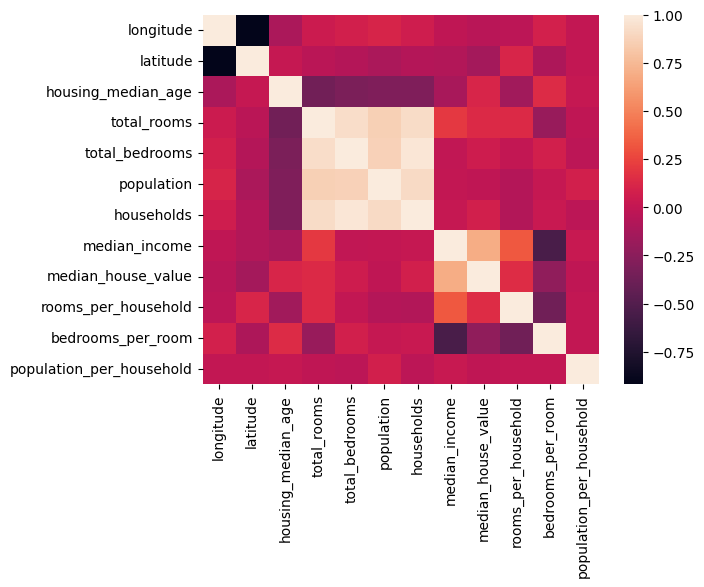

In [12]:
sns.heatmap(corrM)

In [13]:
corrM[corrM != 1.00].max() # --> total_bedrooms and households both correlate with p = 0.97

longitude                   0.10
latitude                    0.11
housing_median_age          0.14
total_rooms                 0.93
total_bedrooms              0.97
population                  0.91
households                  0.97
median_income               0.69
median_house_value          0.69
rooms_per_household         0.33
bedrooms_per_room           0.14
population_per_household    0.07
dtype: float64

### Make median_house_value binary

    We need to turn the median_house_value variable from numeric into binary.
    Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [14]:
mean_house_value = data['median_house_value'].mean()
mean_house_value

206855.81690891474

In [15]:
data['median_house_value'] = data['median_house_value'].apply(lambda x: 1 if x>=mean_house_value else 0)
data['median_house_value']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: median_house_value, Length: 20640, dtype: int64

### Split the data

    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value (median_house_value) is not in your dataframe.

In [16]:
X = data.drop(columns=['median_house_value'], axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [17]:
y = data['median_house_value']
y

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: median_house_value, Length: 20640, dtype: int64

In [18]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_val: ', X_val.shape)
print('y_val: ', y_val.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (12384, 12)
y_train:  (12384,)
X_val:  (4128, 12)
y_val:  (4128,)
X_test:  (4128, 12)
y_test:  (4128,)


### Question 3

    Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
    Round it to 2 decimals using round(score, 2)
    What is their mutual information score?

Options:

    0.26
    0
    0.10
    0.16

In [19]:
mutual_info_score(X_train['ocean_proximity'], y_train)

0.09957548853562478

### Question 4

    Now let's train a logistic regression
    Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

    0.60
    0.72
    0.84
    0.95

In [20]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     5486
INLAND        3858
NEAR OCEAN    1627
NEAR BAY      1411
ISLAND           2
Name: ocean_proximity, dtype: int64

In [21]:
categorical_columns = ['ocean_proximity']
numerical_columns = X_train.select_dtypes(include=np.number).columns.tolist()

dv = DictVectorizer(sparse=False)

train_dict = X_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [22]:
resulting_df = pd.DataFrame(X_train)
resulting_df.columns = dv.get_feature_names_out()
resulting_df

,bedrooms_per_room,households,housing_median_age,latitude,longitude,median_income,ocean_proximity=<1H OCEAN,ocean_proximity=INLAND,ocean_proximity=ISLAND,ocean_proximity=NEAR BAY,ocean_proximity=NEAR OCEAN,population,population_per_household,rooms_per_household,total_bedrooms,total_rooms
0,0.322785,448.0,27.0,33.79,-118.18,2.0186,0.0,0.0,0.0,0.0,1.0,1896.0,4.232143,3.526786,510.0,1580.0
1,0.197285,742.0,12.0,37.73,-120.95,2.8565,0.0,1.0,0.0,0.0,0.0,2650.0,3.571429,4.863881,712.0,3609.0
2,0.362809,901.0,15.0,37.63,-122.43,3.5214,0.0,0.0,0.0,0.0,1.0,1447.0,1.605993,3.049945,997.0,2748.0
3,0.186856,291.0,38.0,40.79,-124.14,2.4896,0.0,0.0,0.0,0.0,1.0,873.0,3.000000,5.333333,290.0,1552.0
4,0.202717,221.0,35.0,34.12,-117.90,3.3322,1.0,0.0,0.0,0.0,0.0,804.0,3.638009,4.330317,194.0,957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.265060,160.0,52.0,33.34,-118.32,2.7361,0.0,0.0,1.0,0.0,0.0,341.0,2.131250,6.225000,264.0,996.0
12380,0.182670,595.0,21.0,36.88,-121.60,4.7813,1.0,0.0,0.0,0.0,0.0,1862.0,3.129412,5.741176,624.0,3416.0
12381,0.200095,414.0,24.0,33.73,-117.99,3.8365,1.0,0.0,0.0,0.0,0.0,1181.0,2.852657,5.082126,421.0,2104.0
12382,0.185517,515.0,22.0,38.40,-122.89,4.5110,1.0,0.0,0.0,0.0,0.0,1445.0,2.805825,5.631068,538.0,2900.0


In [23]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [24]:
df_pred = pd.DataFrame()
df_pred['prediction'] = y_pred
df_pred['actual'] = np.array(y_val)
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,prediction,actual,correct
0,0,0,True
1,1,1,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
4123,1,1,True
4124,0,0,True
4125,0,0,True
4126,0,0,True


In [25]:
accuracy = df_pred.correct.mean()
accuracy

0.8287306201550387

### Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
    Which of following feature has the smallest difference?
        total_rooms
        total_bedrooms
        population
        households

Note: the difference doesn't have to be positive

In [26]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
all_features = dv.get_feature_names_out()
accuracy_list = []
    
for feature in all_features:
       
    X_train_df = pd.DataFrame(X_train)
    X_train_df.columns = dv.get_feature_names_out()
    X_train_df = X_train_df.drop(columns=[feature], axis=1)
    
    X_val_df = pd.DataFrame(X_val)
    X_val_df.columns = dv.get_feature_names_out()
    X_val_df = X_val_df.drop(columns=[feature], axis=1)
    
    model.fit(X_train_df, y_train)
    y_pred = model.predict(X_val_df)

    df_pred = pd.DataFrame()
    df_pred['prediction'] = y_pred
    df_pred['actual'] = np.array(y_val)
    df_pred['correct'] = df_pred.prediction == df_pred.actual

    accuracy_without_feature = df_pred.correct.mean()
    accuracy_list.append(accuracy_without_feature)

accuracy_dict = dict(zip(all_features, accuracy_list))
accuracy_dict

{'bedrooms_per_room': 0.8287306201550387,
 'households': 0.8280038759689923,
 'housing_median_age': 0.8263081395348837,
 'latitude': 0.8267926356589147,
 'longitude': 0.8219476744186046,
 'median_income': 0.7824612403100775,
 'ocean_proximity=<1H OCEAN': 0.8280038759689923,
 'ocean_proximity=INLAND': 0.8284883720930233,
 'ocean_proximity=ISLAND': 0.8289728682170543,
 'ocean_proximity=NEAR BAY': 0.8289728682170543,
 'ocean_proximity=NEAR OCEAN': 0.8272771317829457,
 'population': 0.8296996124031008,
 'population_per_household': 0.8294573643410853,
 'rooms_per_household': 0.8282461240310077,
 'total_bedrooms': 0.8270348837209303,
 'total_rooms': 0.8280038759689923}

In [27]:
accuracy_df = pd.DataFrame(accuracy_dict, index=[0])
accuracy_df = accuracy_df.T
accuracy_df["overall_accuracy"] = accuracy
accuracy_df["difference"] = abs(accuracy_df["overall_accuracy"] - accuracy_df[0])
accuracy_df

,0,overall_accuracy,difference
bedrooms_per_room,0.828731,0.828731,0.000000
households,0.828004,0.828731,0.000727
housing_median_age,0.826308,0.828731,0.002422
latitude,0.826793,0.828731,0.001938
longitude,0.821948,0.828731,0.006783
median_income,0.782461,0.828731,0.046269
ocean_proximity=<1H OCEAN,0.828004,0.828731,0.000727
ocean_proximity=INLAND,0.828488,0.828731,0.000242
ocean_proximity=ISLAND,0.828973,0.828731,0.000242
ocean_proximity=NEAR BAY,0.828973,0.828731,0.000242


In [28]:
print(accuracy_df[accuracy_df.difference == accuracy_df.difference.min()])

                          0  overall_accuracy  difference
bedrooms_per_room  0.828731          0.828731         0.0


In [29]:
accuracy_df.loc[['total_rooms', 'total_bedrooms', 'population', 'households']] # --> households make the smallest impact from these four features

,0,overall_accuracy,difference
total_rooms,0.828004,0.828731,0.000727
total_bedrooms,0.827035,0.828731,0.001696
population,0.829700,0.828731,0.000969
households,0.828004,0.828731,0.000727


### Question 6

    For this question, we'll see how to use a linear regression model from Scikit-Learn
    We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
    Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
    This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
    Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

    0
    0.01
    0.1
    1
    10


In [30]:
# Repeating the previous steps anew instead of fetching things from in between, so this notebook stays clean

# Data Preparation
data = pd.read_csv('data/housing.csv')
data.fillna(data['total_bedrooms'].median(), inplace=True)
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Train Test Split
X = data.drop(columns=['median_house_value'], axis=1)
y = data['median_house_value']
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25)

# Transforming the target value logarithmically
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

# Vectorizing categorigal values
categorical_columns = ['ocean_proximity']
numerical_columns = X_train.select_dtypes(include=np.number).columns.tolist()

dv = DictVectorizer(sparse=False)

train_dict = X_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [36]:
# Training a Ridge Regression Model
alphas = [0, 0.01, 0.1, 1, 10]
predictions = []
for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    predictions.append(y_pred)

predictions

[array([12.33083371, 12.18981009, 12.07485548, ..., 12.06567387,
        12.10966484, 12.20276208]),
 array([12.33083371, 12.18981009, 12.07485548, ..., 12.06567387,
        12.10966484, 12.20276208]),
 array([12.33083371, 12.18981009, 12.07485548, ..., 12.06567387,
        12.10966484, 12.20276208]),
 array([12.33083371, 12.1898101 , 12.07485549, ..., 12.06567388,
        12.10966483, 12.20276209]),
 array([12.33083368, 12.18981022, 12.07485553, ..., 12.06567395,
        12.1096647 , 12.20276217])]

In [38]:
# Calculating the RMSEs for the different alpha values

rmse_for_alphas = []

for y_pred in predictions:
    rmse = np.sqrt(mean_squared_error(y_val,y_pred))
    rmse_for_alphas.append(rmse)
    
resulting_dict = dict(zip(alphas, rmse_for_alphas))
resulting_dict

{0: 0.5251016963884853,
 0.01: 0.5251016964109124,
 0.1: 0.5251016966408102,
 1: 0.525101698900538,
 10: 0.5251017215145874}

In [50]:
# Returning the alpha that causes the smallest RMSE

min(resulting_dict, key=resulting_dict.get), resulting_dict[min(resulting_dict, key=resulting_dict.get)]

(0, 0.5251016963884853)